>> # CUSTOMER CHURN

# Business Understanding

Churn is the number of people who stop to use or subscribe to a particular service or product. 

Churn is high in industries where competition is high and consumers have multiple suppliers to choose from

Syriatel a leading mobile network provider in Syria is looking to build a model that will predict the possibilities of a customer churning or remaining in the company. And to know which variables mostly affect the possibility of a customer churning.

This information will then help Syriatel to know which Areas need improvement to avoid the possibilty of a customer leaving which leads to financial losses.

 # <u>OBJECTIVE</u>
 The objective of this project is to build and identify machine learning classification model that will correctly classify if a customer will churn or remain in Syriatel

 ## Other Objectives
- Knowing which variables have great impact on customer churn.
- knowing the relationship between customer churn and other variables.
- Using the features identified to predict future probabilities.

# load libraries

In [1]:
#for data manipulation and data reading 
import pandas as pd

#for mathematical computation
import numpy as np

#for visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#for preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


#for classification
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

# for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier




# Data Understanding

In [2]:
#loading the dataset
churn_data = pd.read_csv("customer_churn.csv")
churn_data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
churn_data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [4]:
#function to print out the different data types in our dataframe
def type_of_data(dataframe):
    integer_columns = dataframe.select_dtypes(include="int64")
    float_columns = dataframe.select_dtypes(include="float")
    string_columns = dataframe.select_dtypes(include="object")
    bool_columns = dataframe.select_dtypes(include= "bool")
    
    print(f"There are {len(integer_columns.columns)} numerical columns and the columns are: {list(integer_columns.columns)}")
    print(f"There are {len(float_columns.columns)} decimal columns and the columns are: {list(float_columns.columns)}")
    print(f"There are {len(string_columns.columns)} string columns and the columns are: {list(string_columns.columns)}")
    print(f"There are {len(bool_columns.columns)} boolean columns and the columns are: {list(bool_columns.columns)}")


In [5]:
type_of_data(churn_data)

There are 8 numerical columns and the columns are: ['account length', 'area code', 'number vmail messages', 'total day calls', 'total eve calls', 'total night calls', 'total intl calls', 'customer service calls']
There are 8 decimal columns and the columns are: ['total day minutes', 'total day charge', 'total eve minutes', 'total eve charge', 'total night minutes', 'total night charge', 'total intl minutes', 'total intl charge']
There are 4 string columns and the columns are: ['state', 'phone number', 'international plan', 'voice mail plan']
There are 1 boolean columns and the columns are: ['churn']


### Domain knowledge 

* state: string column about state the customer lives in
* account length: integer  column on number of days the customer has had an account
* area code: integer column about area code of the customer
* phone number: string column containing phone number of the customer
* international plan: string column if the customer has the international plan yes, otherwise no
* voice mail plan:string column if the customer has the voice mail plan yes, otherwise no
* number vmail messages:integer column containing number of voicemails the customer has sent
* total day minutes:float column containing total number of minutes the customer has been in calls during the day
* total day calls: integer column containing total number of calls the user has done during the day
* total day charge: float column containing total amount of money the customer was charged by the Telecom company for calls during the day
* total eve minutes: float column containing total number of minutes the customer has been in calls during the evening
* total eve calls: integer column containing total number of calls the customer has done during the evening
* total eve charge: float column containing total amount of money the customer was charged by the Telecom company for calls during the evening
* total night minutes: float column containg total number of minutes the customer has been in calls during the night
* total night calls: integer column containing total number of calls the customer has done during the night
* total night charge: float column containing total amount of money the customer was charged by the Telecom company for calls during the night
* total intl minutes: float column containing total number of minutes the user has been in international calls
* total intl calls: integer column containing total number of international calls the customer has done
* total intl charge: float column containing total amount of money the customer was charged by the Telecom company for international calls
* customer service calls: integer column containing number of calls the customer has made to customer service
* churn: boolean column containig true if the customer terminated their contract, otherwise false

From the above description it has been noticed that 'phone number' is the only unique identifier and it will be used to check for duplicates and then droped for data privacy and protecting customer data

'churn' will be our target variable because it is the ultimate aim of the company and it is a dependent variable.

### Data exploration

In [6]:
#Function for printing out shape of our data
def shape_of(Dataframe):
    shape = Dataframe.shape
    print(f"Our data has {shape[0]} rows and {shape[1]} columns")

In [7]:
shape_of(churn_data)

Our data has 3333 rows and 21 columns


### Data quality

In [8]:
# missing value and duplicated values
def data_quality(Dataframe):
    missing_values =  Dataframe.isna().sum()
    total_missing = missing_values.sum()
    duplicated_value = Dataframe["phone number"].duplicated().sum()
    # "phone number" is used to check for duplicates because it is the only personal unique identifier
    
    print(f"This data has : {total_missing} missing values")
    print(f"This data has : {duplicated_value} duplicated values")
    

In [9]:
data_quality(churn_data)

This data has : 0 missing values
This data has : 0 duplicated values


### Outliers

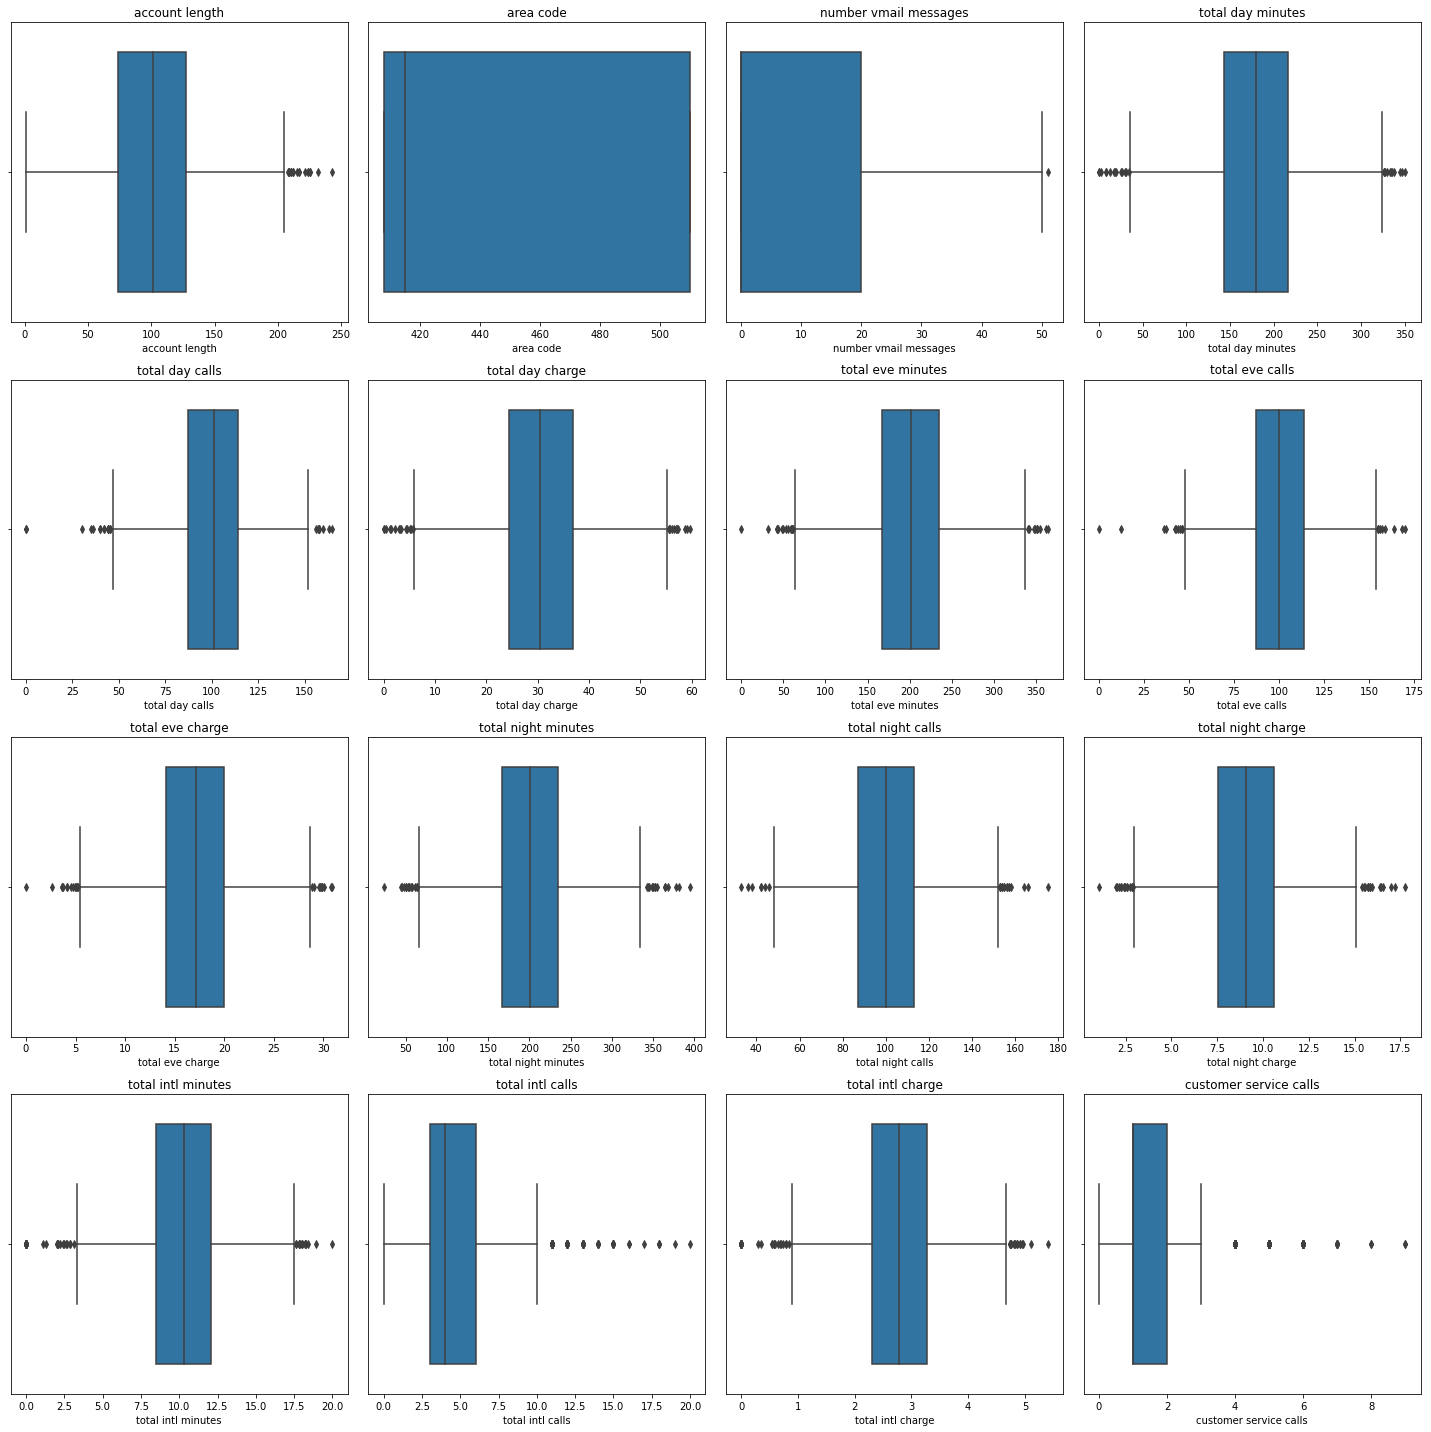

In [10]:
#numerical columns
numerical_cols = churn_data.select_dtypes(include="number")

#ploting a combined boxplot to check for all of them
plt.figure(figsize=(20, 20))

for i, col in enumerate(numerical_cols.columns):
    plt.subplot(4, 4, i+1)
    churn_data[col] = churn_data[col].astype(float)
    sns.boxplot(x=churn_data[col])
    plt.title(col)

plt.tight_layout()
plt.show()


### Data cleaning 
- Missing values 
churn data does not have missing values 

- Duplicates 
churn data does not have any dplicated values

- outliers 
Churn data has outliers but because it is a classification model we will not drop them because they maybe genuine values that affect our data

## Exploratory Data Analysis

- In exploratory data analysis we will work out:

        1- Univariate analysis

        2- Bivariate analysis

        3- Multivariate analysis
        
  To see if there are any patterns or relationship between the features.      

 1 - Univariate analysis
 
 for univariate analysis we will explore the bar graphs and the percentage of categorical columns

In [11]:
churn_data.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [12]:


def uni_analysis_of(feature):
    sns.countplot(data=churn_data, x=feature)
    plt.title(f"{feature} analysis")
    plt.show()

    number_of_values = churn_data[feature].value_counts()
    total_count = len(churn_data)
    percentages = number_of_values / total_count * 100

    print("Value Counts:")
    print(number_of_values)
    print("\nPercentages:")
    print(percentages)


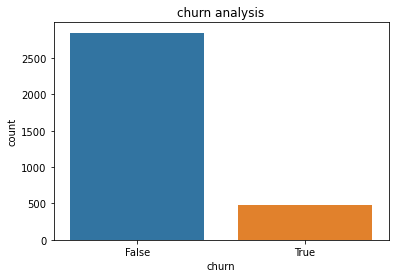

Value Counts:
False    2850
True      483
Name: churn, dtype: int64

Percentages:
False    85.508551
True     14.491449
Name: churn, dtype: float64


In [13]:
uni_analysis_of("churn")

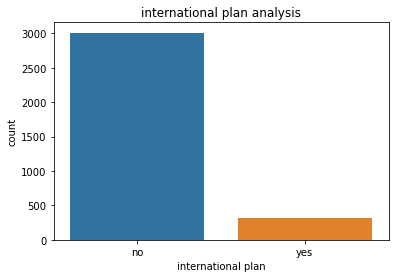

Value Counts:
no     3010
yes     323
Name: international plan, dtype: int64

Percentages:
no     90.309031
yes     9.690969
Name: international plan, dtype: float64


In [14]:
uni_analysis_of("international plan")

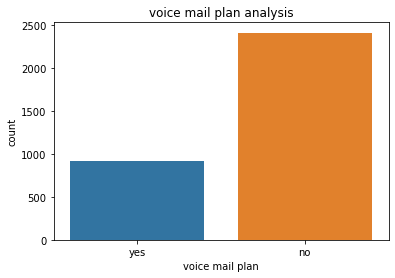

Value Counts:
no     2411
yes     922
Name: voice mail plan, dtype: int64

Percentages:
no     72.337234
yes    27.662766
Name: voice mail plan, dtype: float64


In [15]:
uni_analysis_of("voice mail plan")

2- Bivariate analysis

for bivariate analysis we will look at how different features relate with churn

In [16]:
def bi_analysis(feature):

    sns.countplot(data=churn_data, x=feature, hue="churn")
    plt.title(f"{feature} vs churn")
    plt.show()

    print(churn_data.groupby([feature, "churn"]).size())

    # Calculate the value counts and percentages for the feature.
    number_of_values = churn_data[feature].value_counts()
    total_count = len(churn_data)
    percentages = number_of_values / total_count * 100
    print("\nPercentages:")
    print(percentages)


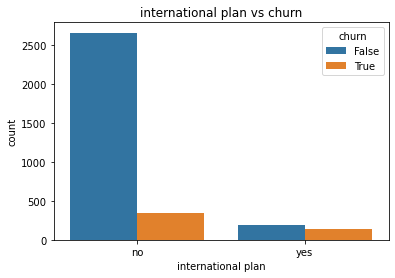

international plan  churn
no                  False    2664
                    True      346
yes                 False     186
                    True      137
dtype: int64

Percentages:
no     90.309031
yes     9.690969
Name: international plan, dtype: float64


In [17]:
bi_analysis("international plan")

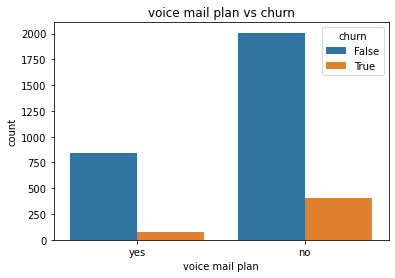

voice mail plan  churn
no               False    2008
                 True      403
yes              False     842
                 True       80
dtype: int64

Percentages:
no     72.337234
yes    27.662766
Name: voice mail plan, dtype: float64


In [18]:
bi_analysis("voice mail plan")

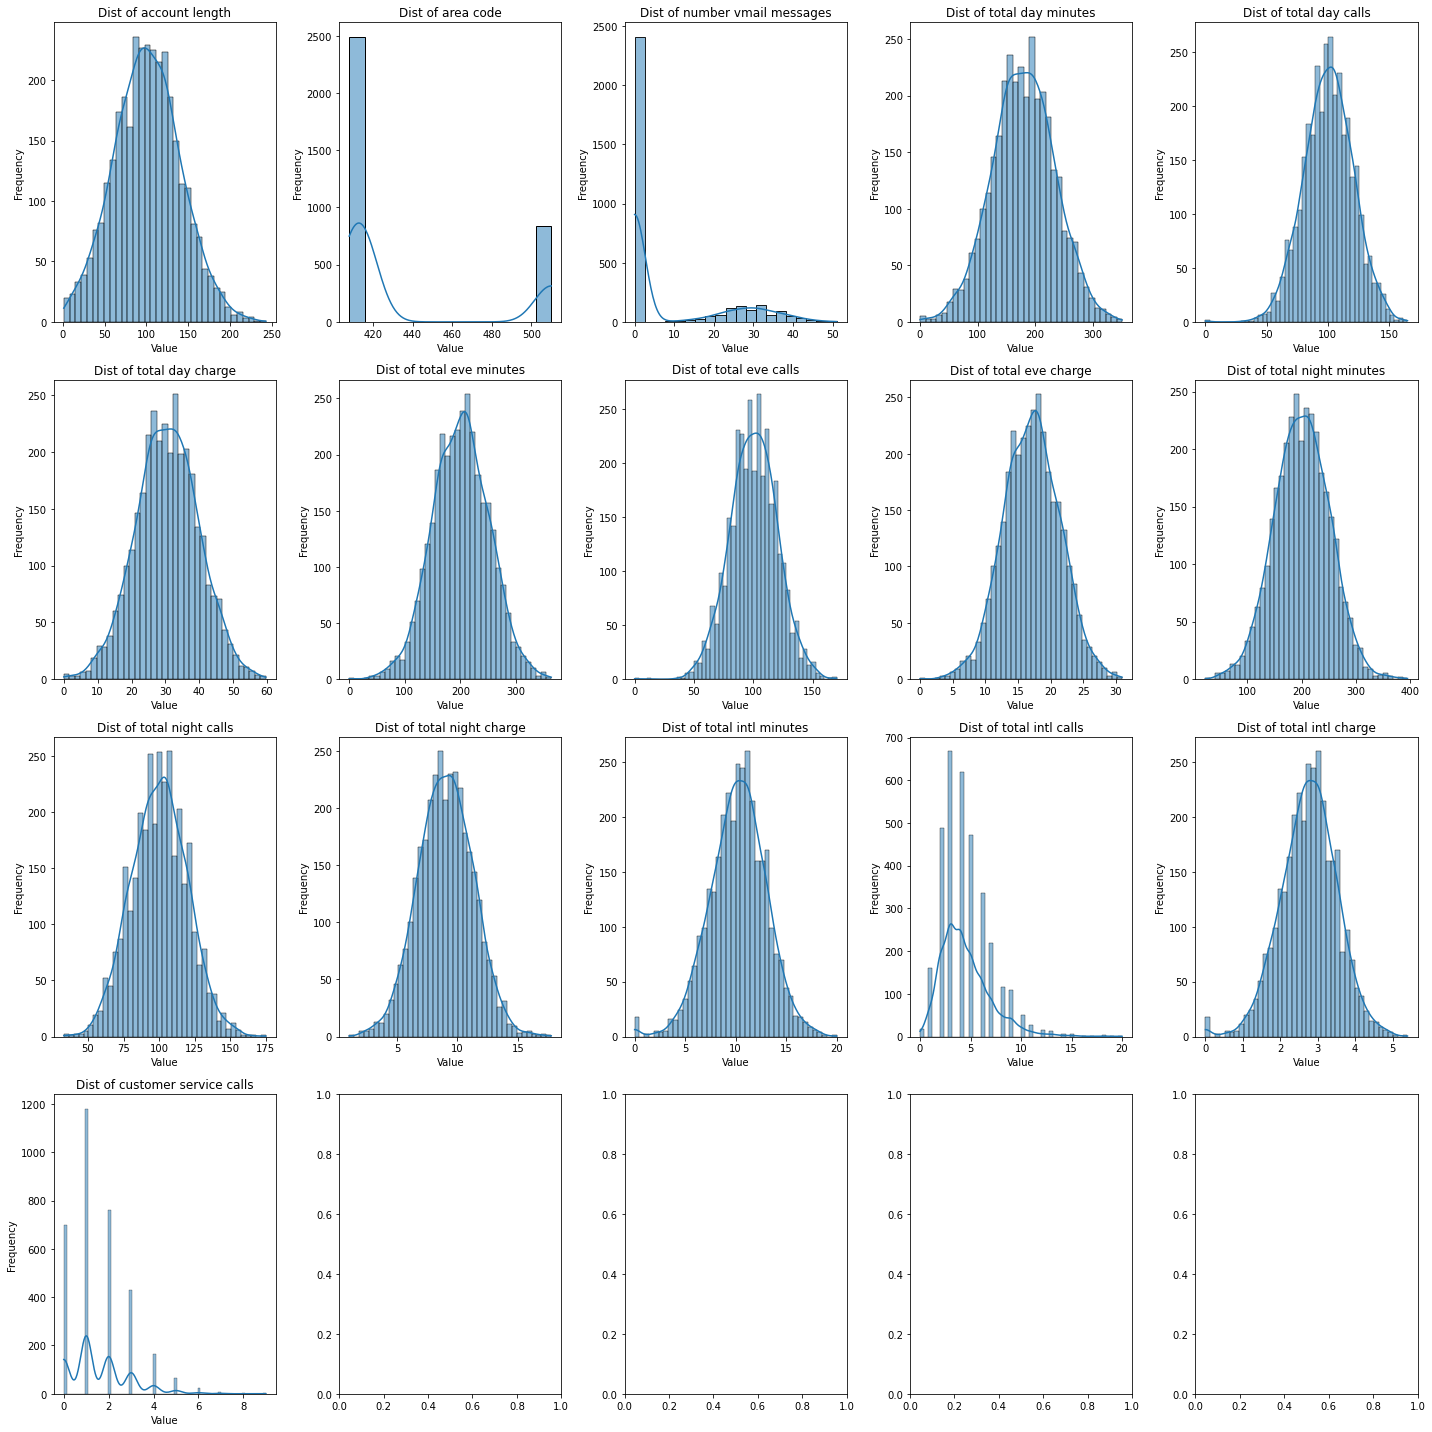

In [19]:


fig, axs = plt.subplots(ncols=5, nrows=4, figsize=(20, 20))

for ax, col in zip(axs.ravel(), churn_data.select_dtypes(include='number').columns):
    sns.histplot(churn_data[col], kde=True, ax=ax)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Dist of {col}')
    

plt.tight_layout()
plt.show()



3- Multivariate analysis

we will draw  a correlation matrix but only display the lower part of it for easy raedability and avoid duplicating

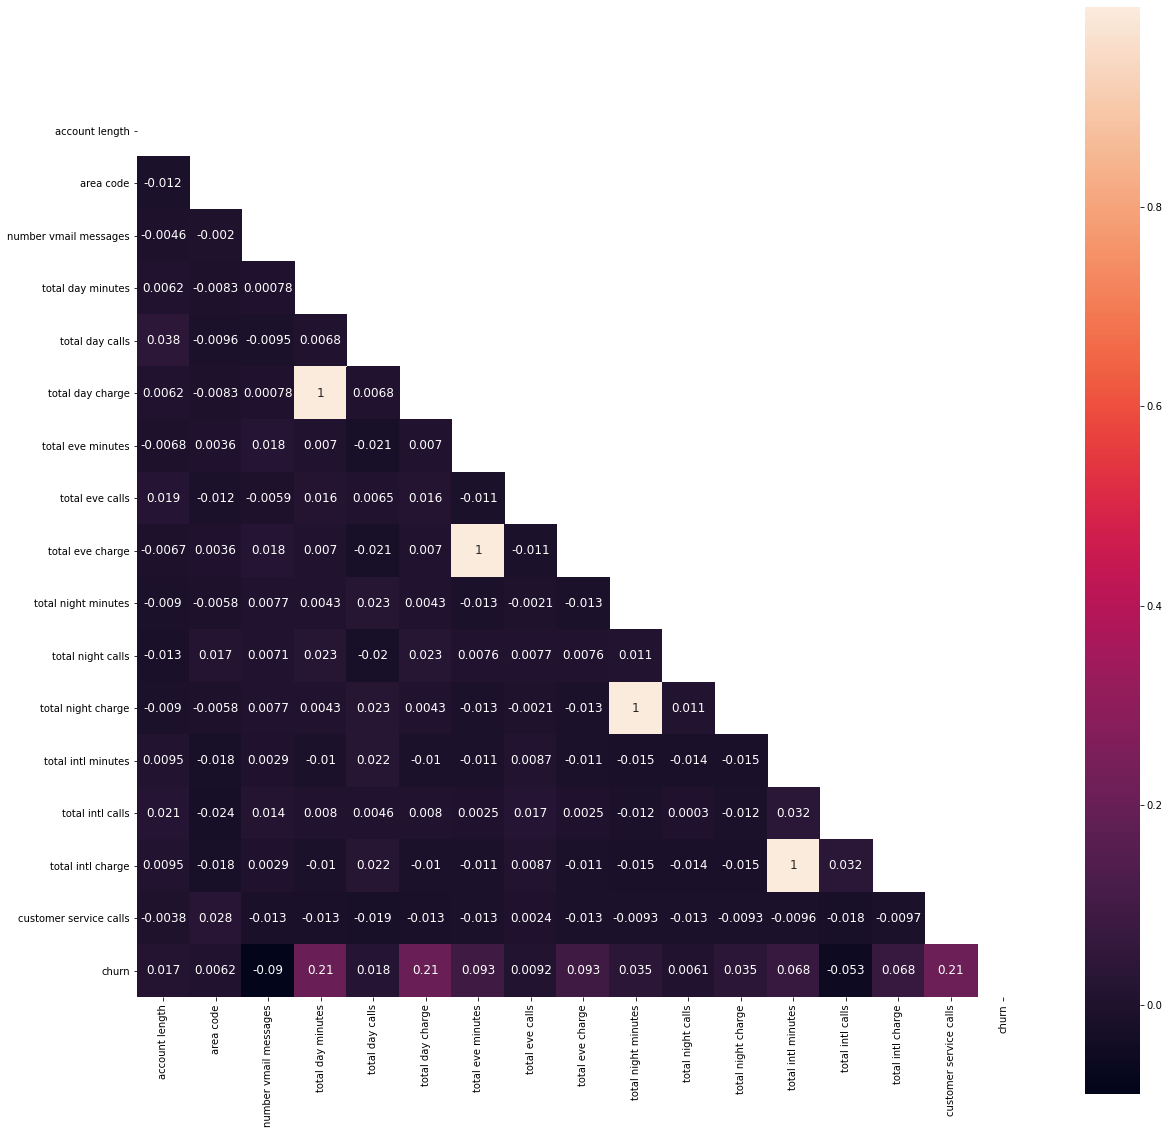

In [20]:


fig, ax = plt.subplots(figsize=(20, 20))
mask = np.triu(np.ones_like(churn_data.corr(), dtype=bool))
sns.heatmap(churn_data.corr(), mask=mask, square=True, ax=ax, annot=True, annot_kws={"fontsize": 12})

plt.show()


> ## Analysis of EDA

- From our EDA we notice that the data is imbalanced where 86% of the customers did not churn

- Only 10% of people are subscribed to international plan

- 72% of people are not subscribed to voice mail

- 137 people who were enrolled in international plan churned

- 403 people with no voice mail churned

- all numerical features are normally distributed apart from churn

- There is multicollinearlity between:

                1 - total day charge and total day minutes

                2 - total eve charge and total eve minutes 
                
                3 - total intl charge and total intl minutes 

                4 - total night charge and total night minutes 

# Data pre processing

In [21]:
# Dropping phone number and state because they are personal identifiers
churn_data = churn_data.drop(['state', 'phone number'], axis=1)


In [22]:
# Dropping one variable that has multicollinearlity
churn_data = churn_data.drop(["total day minutes", "total eve minutes", "total night minutes", "total intl minutes"], axis=1)


In [23]:
shape_of(churn_data)

Our data has 3333 rows and 15 columns


# Data processing for modeling

In [24]:
# Because churn was either true or false we will convert it to  integer 0 will be false and 1 will be true
churn_data['churn'] = churn_data['churn'].astype(int)
churn_data['churn'].head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int32

In [25]:
# for voice mail because there were only 2 values we will use labelencoder

le = LabelEncoder()
churn_data['international plan'] = le.fit_transform(churn_data['international plan'])
churn_data['voice mail plan'] = le.fit_transform(churn_data['voice mail plan'])

#ohe area code
churn_data = pd.get_dummies(churn_data, columns=['area code'], drop_first=True)



In [26]:
shape_of(churn_data)

Our data has 3333 rows and 16 columns


# 3 Modeling

# 3.1 preparing data for modeling

In [27]:
# the target variables is churn and all the other remaining columns are predictor variables
y = churn_data['churn']
X = churn_data.drop(['churn'], axis=1)

# split our data for modeling  split it  70training - 30testing to get more testing data because it was imbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29)


After splitting the data into training and test sets, we use the `starndardScaler()` to fit and transform `X_train` and transform `X_test`. 

-  If you first transform the data and then split into training and test sets this leads to **data leakage**. 

In [28]:
# Scaling data using standardScaler
#instantiate starndardScaler and fit the scaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [29]:
# we noticed our data was highly imbalanced 
# let's try to balance it using  SMOTE (Synthetic Minority Oversampling Technique)
smote = SMOTE(random_state=87)

X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


# 3.2 Modelling

## models to build 

- logistic regression model(base model)
- k-Nearest-Neighbors
- Decision tree classifier
- random forest


EVALUATION AND CLASSIFICATION MATRIX

In [30]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
   

    # Fit the model to the training data.
    model.fit(X_train, y_train)

    # Get the cross-validation score.
    cross_val_score = cross_val_score(model, X_train, y_train, cv=5)

    # Get the confusion matrix.
    confusion_matrix = confusion_matrix(y_test, model.predict(X_test))

    # Get the classification report.
    classification_report = classification_report(y_test, model.predict(X_test))

    return cross_val_score, confusion_matrix, classification_report


In [31]:
# to reduce redundancy

def evaluate_model(model):

    #first fit the  model;
    model.fit(X_train_scaled, y_train)
    # Get the predictions on the test set.
    y_pred = model.predict(X_test_scaled)

    # Get the cross-validation score.
    cross_val_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)

    # confusion matrix.
    cm = ConfusionMatrixDisplay.from_estimator(model, X_train_scaled, y_train);

    #classification report.
    report = print(classification_report(y_test, y_pred))

    return cross_val_scores, cm, report


              precision    recall  f1-score   support

           0       0.89      0.97      0.93       864
           1       0.57      0.22      0.32       136

    accuracy                           0.87      1000
   macro avg       0.73      0.60      0.62      1000
weighted avg       0.84      0.87      0.85      1000



(array([0.88008565, 0.86723769, 0.83940043, 0.86051502, 0.85622318]),
 None)

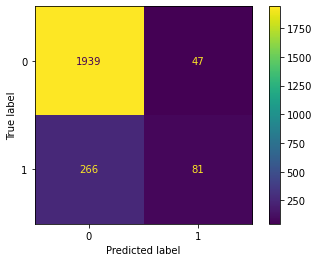

In [32]:
evaluate_model(LogisticRegression())

              precision    recall  f1-score   support

           0       0.88      0.99      0.94       864
           1       0.82      0.17      0.28       136

    accuracy                           0.88      1000
   macro avg       0.85      0.58      0.61      1000
weighted avg       0.88      0.88      0.85      1000



(array([0.87794433, 0.86723769, 0.8608137 , 0.85622318, 0.88197425]),
 None)

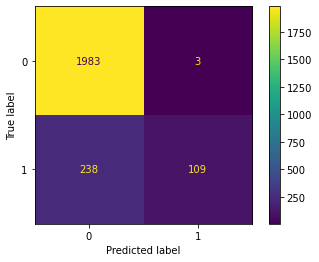

In [33]:
evaluate_model(KNeighborsClassifier(n_neighbors=4)
)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       864
           1       0.75      0.74      0.75       136

    accuracy                           0.93      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.93      0.93      0.93      1000



(array([0.89293362, 0.91006424, 0.90364026, 0.90343348, 0.90987124]),
 None)

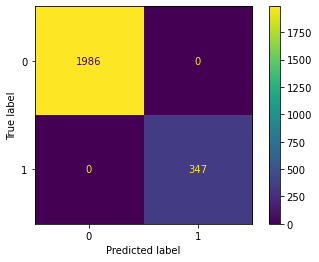

In [34]:
evaluate_model(DecisionTreeClassifier())

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       864
           1       0.92      0.62      0.74       136

    accuracy                           0.94      1000
   macro avg       0.93      0.80      0.85      1000
weighted avg       0.94      0.94      0.94      1000



(array([0.93361884, 0.92933619, 0.94646681, 0.93347639, 0.93347639]),
 None)

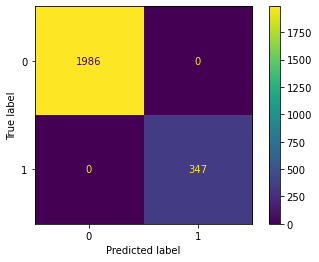

In [35]:
evaluate_model(RandomForestClassifier())

# KNN

# decision tree 

# random forest

In [36]:
pipe = Pipeline([('mms', MinMaxScaler()),
                 ('tree', DecisionTreeClassifier(random_state=123))])

# Create the grid parameter
grid = [{'tree__max_depth': [None, 2, 6, 10], 
         'tree__min_samples_split': [5, 10]}]


# Create the grid, with "pipe" as the estimator
gridsearch = GridSearchCV(estimator=pipe, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=5)

NameError: name 'Pipeline' is not defined

# Evaluation

# FIONE TUNING

# under feature selection

In [ ]:
rfe_cv = RFECV(LinearRegression(), cv=15)
X_rfe_train = rfe_cv.fit_transform(X_poly_train, y_train)
X_rfe_test = rfe_cv.transform(X_poly_test)
lr = LinearRegression()
lr.fit(X_rfe_train, y_train)

rfe_r2, rfe_rmse = run_model(lr, X_rfe_train, X_rfe_test, y_train, y_test)
print('\n----------------\n')
print(f"{X_rfe_train.shape[1]} out of {X_poly_train.shape[1]} features used")
print('Baseline R-Squared:', round(poly_r2, 2))
print('Reduced R-Squared: ', round(rfe_r2, 2)